In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#setting file name
filename = 'coviddata.csv'

df = pd.read_csv(filename)

df

,section,category,metric,type,date,value,publish_date
0,State Data,Cumulative counts to date,Total Vaccine Providers,All COVID Vaccines,NaN,2154.000,2023-05-09
1,State Data,Cumulative counts to date,People Immunized With One Dose,All COVID Vaccines,NaN,4527145.000,2023-05-09
2,State Data,Cumulative counts to date,Eligible People Immunized With One Dose,All COVID Vaccines,NaN,0.787,2023-05-09
3,State Data,Cumulative counts to date,People Fully Immunized,All COVID Vaccines,NaN,4114705.000,2023-05-09
4,State Data,Cumulative counts to date,Eligible People Fully Immunized,All COVID Vaccines,NaN,0.715,2023-05-09
...,...,...,...,...,...,...,...
30369,County-level Data,NaN,Chaffee,All Ages,NaN,0.269,2023-05-09
30370,County-level Data,NaN,Mineral,All Ages,NaN,0.278,2023-05-09
30371,County-level Data,NaN,Broomfield,All Ages,NaN,0.280,2023-05-09
30372,County-level Data,NaN,Boulder,All Ages,NaN,0.309,2023-05-09


In [50]:
# filter for keywords
keywords = ['Pfizer', 'Janssen', 'Novavax', 'Other', 'Moderna']

# df for values
filtered_df = pd.DataFrame()

# loop to filter
for keyword in keywords:
    temp_df = df[df['type'].str.contains(keyword, case=False, na=False)]
    
    # apennding
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)

filtered_df

,section,category,metric,type,date,value,publish_date
0,Vaccine Administration,Administration,Daily Counts,"Additional & Booster Doses, Pfizer",2020-12-12T00:00:00Z,0.0,2023-05-09
1,Vaccine Administration,Administration,Daily Counts,"Additional & Booster Doses, Pfizer",2020-12-13T00:00:00Z,0.0,2023-05-09
2,Vaccine Administration,Administration,Daily Counts,"Additional & Booster Doses, Pfizer",2020-12-14T00:00:00Z,0.0,2023-05-09
3,Vaccine Administration,Administration,Daily Counts,"Additional & Booster Doses, Pfizer",2020-12-15T00:00:00Z,0.0,2023-05-09
4,Vaccine Administration,Administration,Daily Counts,"Additional & Booster Doses, Pfizer",2020-12-16T00:00:00Z,0.0,2023-05-09
...,...,...,...,...,...,...,...
28135,Vaccine Administration,Administration,Weekly Cumulative,"Primary Series Doses, Moderna",2023-04-09T00:00:00Z,3086053.0,2023-05-09
28136,Vaccine Administration,Administration,Weekly Cumulative,"Primary Series Doses, Moderna",2023-04-16T00:00:00Z,3086331.0,2023-05-09
28137,Vaccine Administration,Administration,Weekly Cumulative,"Primary Series Doses, Moderna",2023-04-23T00:00:00Z,3086715.0,2023-05-09
28138,Vaccine Administration,Administration,Weekly Cumulative,"Primary Series Doses, Moderna",2023-04-30T00:00:00Z,3087064.0,2023-05-09


In [52]:
# on the columns needed
filtered_df_subset = filtered_df[['type', 'date', 'value']]

# displaying columns
filtered_df_subset

,type,date,value
0,"Additional & Booster Doses, Pfizer",2020-12-12T00:00:00Z,0.0
1,"Additional & Booster Doses, Pfizer",2020-12-13T00:00:00Z,0.0
2,"Additional & Booster Doses, Pfizer",2020-12-14T00:00:00Z,0.0
3,"Additional & Booster Doses, Pfizer",2020-12-15T00:00:00Z,0.0
4,"Additional & Booster Doses, Pfizer",2020-12-16T00:00:00Z,0.0
...,...,...,...
28135,"Primary Series Doses, Moderna",2023-04-09T00:00:00Z,3086053.0
28136,"Primary Series Doses, Moderna",2023-04-16T00:00:00Z,3086331.0
28137,"Primary Series Doses, Moderna",2023-04-23T00:00:00Z,3086715.0
28138,"Primary Series Doses, Moderna",2023-04-30T00:00:00Z,3087064.0


In [54]:
# function to extract
def extract_keyword(text):
    for keyword in ['Pfizer', 'Janssen', 'Novavax', 'Other', 'Moderna']:
        if re.search(keyword, text, re.IGNORECASE):
            return keyword
    return text

filtered_df_subset.loc[:, 'type'] = filtered_df_subset['type'].apply(extract_keyword)

# display df
filtered_df_subset

,type,date,value
0,Pfizer,2020-12-12T00:00:00Z,0.0
1,Pfizer,2020-12-13T00:00:00Z,0.0
2,Pfizer,2020-12-14T00:00:00Z,0.0
3,Pfizer,2020-12-15T00:00:00Z,0.0
4,Pfizer,2020-12-16T00:00:00Z,0.0
...,...,...,...
28135,Moderna,2023-04-09T00:00:00Z,3086053.0
28136,Moderna,2023-04-16T00:00:00Z,3086331.0
28137,Moderna,2023-04-23T00:00:00Z,3086715.0
28138,Moderna,2023-04-30T00:00:00Z,3087064.0


In [68]:
# converting dates
filtered_df_subset['date'] = pd.to_datetime(filtered_df_subset['date'])

# formatting
filtered_df_subset['date'] = filtered_df_subset['date'].dt.strftime('%Y-%m-%d')

# displaying
filtered_df_subset


,type,date,value
0,Pfizer,2020-12-12,0.0
1,Pfizer,2020-12-13,0.0
2,Pfizer,2020-12-14,0.0
3,Pfizer,2020-12-15,0.0
4,Pfizer,2020-12-16,0.0
...,...,...,...
28135,Moderna,2023-04-09,3086053.0
28136,Moderna,2023-04-16,3086331.0
28137,Moderna,2023-04-23,3086715.0
28138,Moderna,2023-04-30,3087064.0


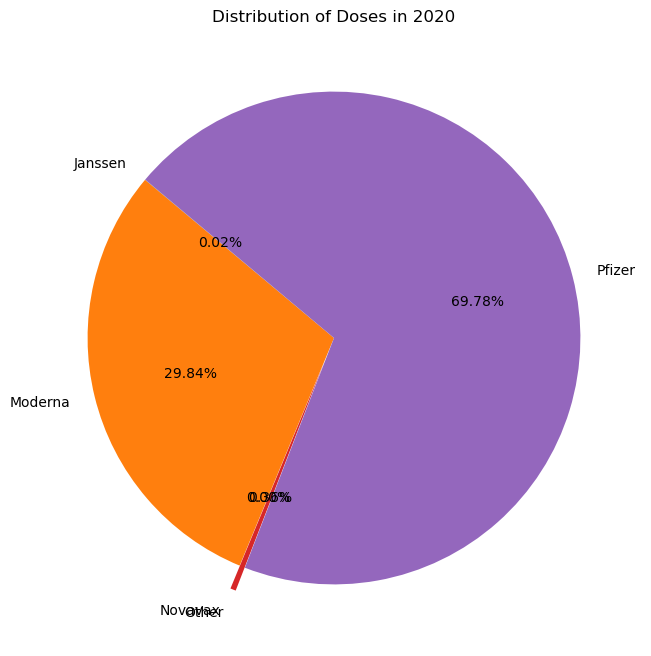

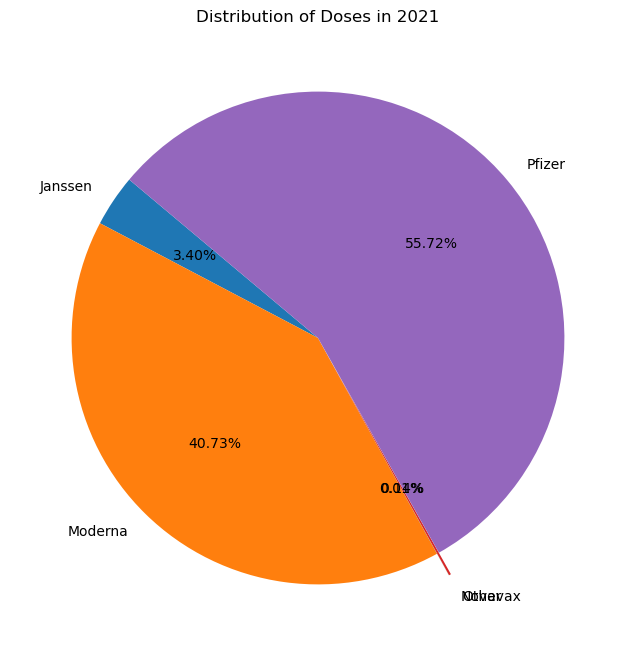

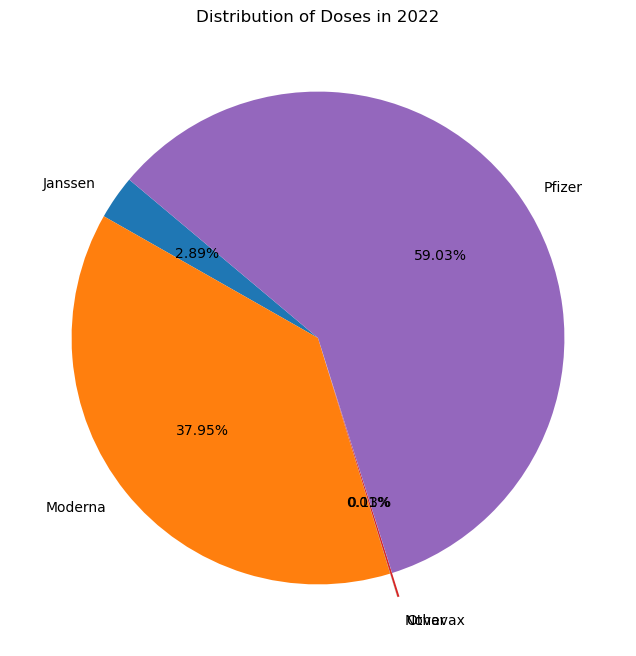

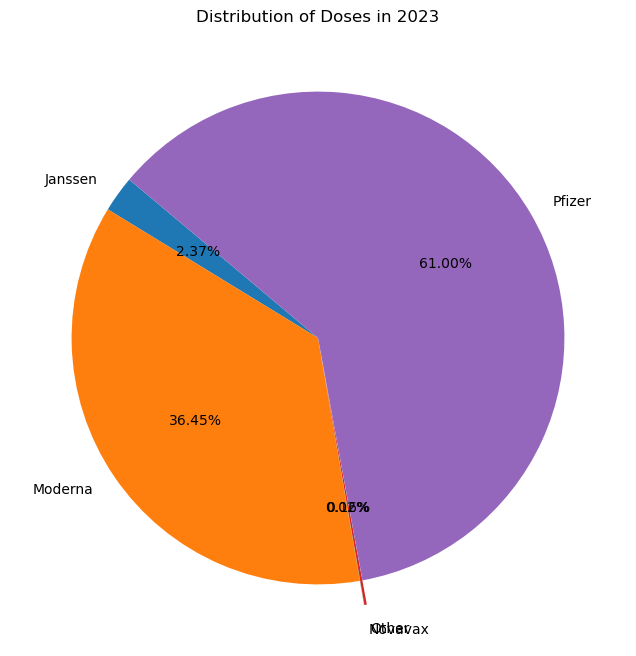

In [84]:
# formatting date for chart
filtered_df_subset['date'] = pd.to_datetime(filtered_df_subset['date'], errors='coerce')

# getting the year
filtered_df_subset['year'] = filtered_df_subset['date'].dt.year

# grouping the dates
annual_data = filtered_df_subset.groupby(['type', 'year'])['value'].sum().reset_index()

# grabbing the unique years
unique_years = annual_data['year'].unique()

# pie chart time
for year in unique_years:
    data_for_year = annual_data[annual_data['year'] == year]
    
    explode = [0.1 if x in ['Novavax', 'Other'] else 0 for x in data_for_year['type']]
    
    plt.figure(figsize=(8, 8))
    plt.pie(data_for_year['value'], labels=data_for_year['type'], autopct='%1.2f%%', startangle=140, explode=explode)
    plt.title(f'Distribution of Doses in {year}')
    plt.show()



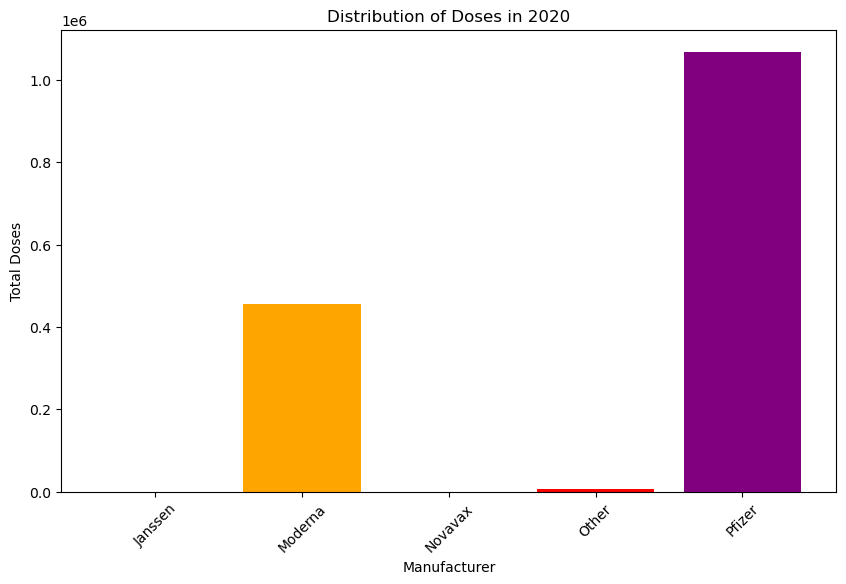

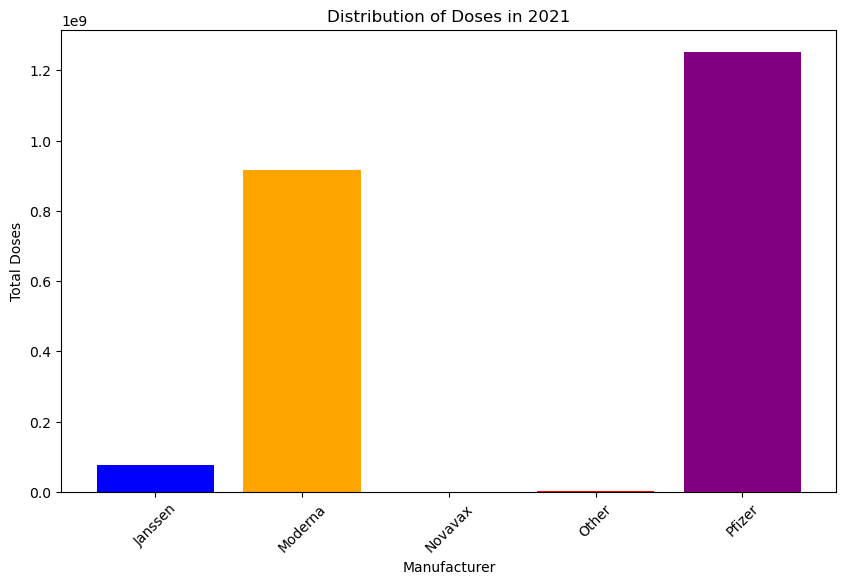

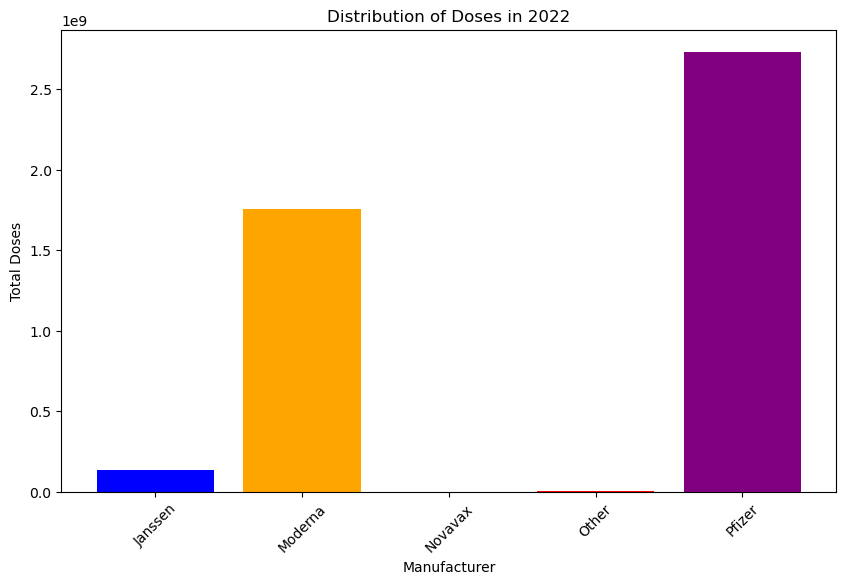

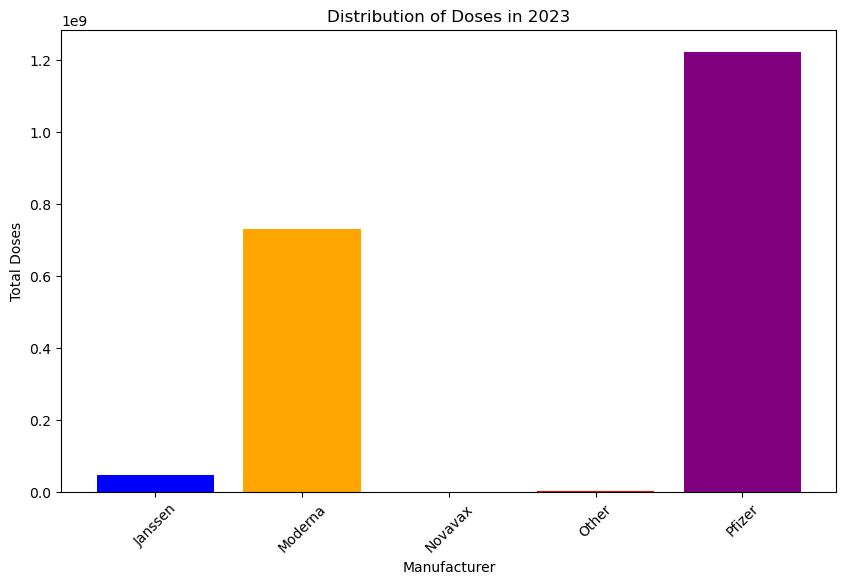

In [82]:
# formatting date
filtered_df_subset['date'] = pd.to_datetime(filtered_df_subset['date'], errors='coerce')

# grabbing the year
filtered_df_subset['year'] = filtered_df_subset['date'].dt.year

# grouping
annual_data = filtered_df_subset.groupby(['type', 'year'])['value'].sum().reset_index()

# getting the unique years
unique_years = annual_data['year'].unique()

# bar chart time
for year in unique_years:
    data_for_year = annual_data[annual_data['year'] == year]
    
    plt.figure(figsize=(10, 6))
    plt.bar(data_for_year['type'], data_for_year['value'], color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(f'Distribution of Doses in {year}')
    plt.xlabel('Manufacturer')
    plt.ylabel('Total Doses')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()
